Correlation lengths L: [  0.1   1.   10.  100. ]
L values correspond to: ['1.0e-01', '1.0e+00', '1.0e+01', '1.0e+02']


(0.0, 11.0)

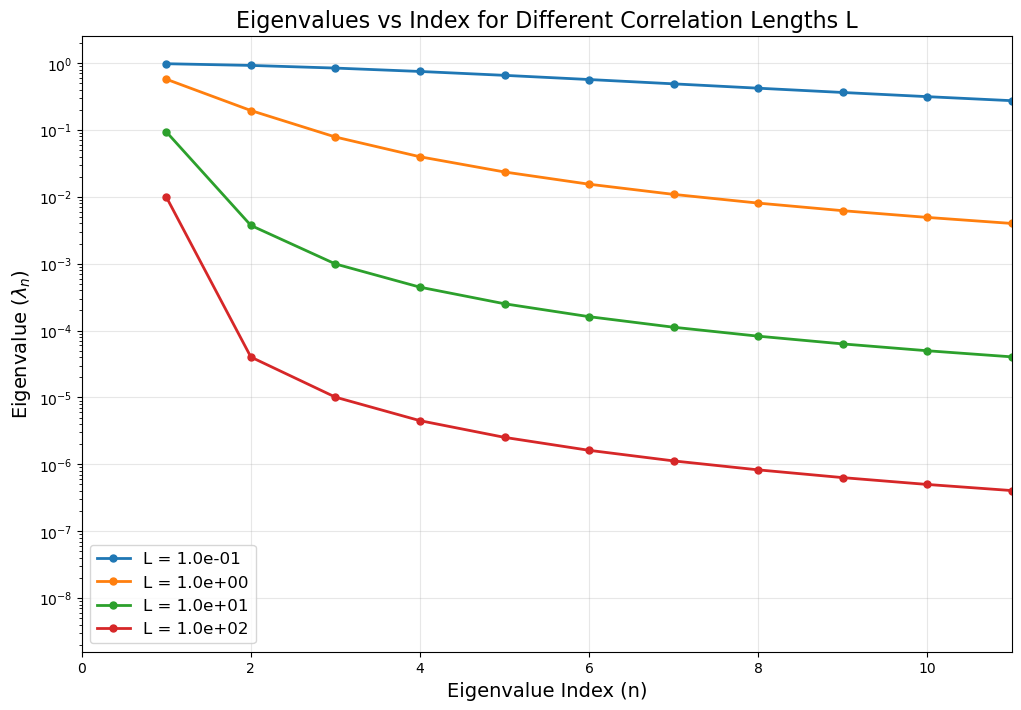

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat('HW03_EtaVals.mat')

L_values = data['L_values'].flatten()  # Shape was (1, 4), flatten to (4,)
eta_names = ['etaVals_000p1', 'etaVals_001p0', 'etaVals_010p0', 'etaVals_100p0']

print(f"Correlation lengths L: {L_values}")
print(f"L values correspond to: {[f'{l:.1e}' for l in L_values]}")

plt.figure(figsize=(12, 8))

# Plot each set of eigenvalues
for i, eta_name in enumerate(eta_names):
    L = L_values[i]
    eigenvalues = 1/(1+(L**2) * (data[eta_name].flatten()**2))  # Shape was (1, 100), flatten to (100,)
    indices = np.arange(1, len(eigenvalues) + 1)
    
    plt.semilogy(indices, eigenvalues, 'o-', linewidth=2, markersize=5, 
                label=f'L = {L_values[i]:.1e}')

# Add labels and title
plt.xlabel('Eigenvalue Index (n)', fontsize=14)
plt.ylabel('Eigenvalue ($\lambda_n$)', fontsize=14)
plt.title('Eigenvalues vs Index for Different Correlation Lengths L', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 11)
# plt.ylim(bottom=1e-15, top = 10**0)  # Adjust based on your data range


Example 5.2 suggests that uncorrelated processes $C(x,y) = \delta(x-y)$ have all eigenvalues = 1 (no decay). At small L, our covariance function is approiximately diagonal, suggesting nearly uncorrelated processes; in this case, the eigenvalues decay very slowly (for example, the blue line at L = 1e-1 has eigenvalues that drop by less than one order of magnitude, across 10 eigenvalues). Additionally, 5.2 suggests that the eigenvalues decay proportionally to $1/L^2$, so, at large L values, eigenvalues decay quickly, and at small L values, the eigenvalues remain large. So, our plot agrees with Example 5.2's comments on uncorrelated processes. 

Exercise 5.1 suggests that at small L values, we have a dirac delta behavior of the C(0,y). With a dirac delta in position space, we have a flat spectrum in frequency space. So, as in Example 5.2, at small L values, all eigenmodes contribute equally with minimal eigenvalue decay. 
At large L values, we have a nearly constant function, so only the first few eigenvalues are significant. 

# 3.2

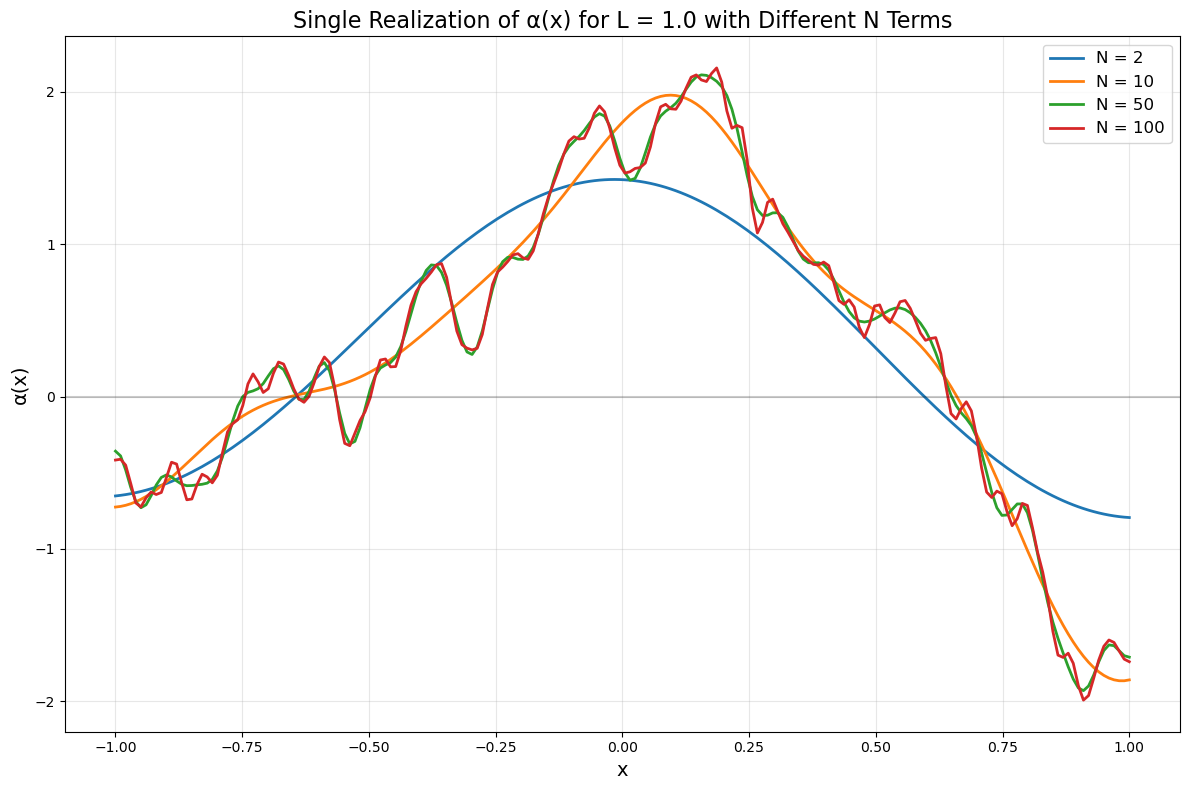

L = 1.0
Mean of Q: -0.10384651739409384
Variance of Q: 0.8165221946938584


In [2]:

np.random.seed(42)  
Q = np.random.randn(100)  

L = 1.0
N_terms = [ 2, 10, 50, 100]

x = np.linspace(-1, 1, 200)

eta_n = data['etaVals_001p0'].flatten()  

# Function to compute eigenfunctions φ_n(x)
def eigenfunction(n, x, L=1.0):

    if n % 2 == 0:  # Even index (1-based indexing)
        η = eta_n[n-1]
        return np.sin(η * x) / np.sqrt(0.5 - np.sin(2*η)/(4*η))
    else:  # Odd index
        η = eta_n[n-1]
        return np.cos(η * x) / np.sqrt(0.5 + np.sin(2*η)/(4*η))

# Compute α(x) for different N values
plt.figure(figsize=(12, 8))
alpha_mean = np.cos(np.pi*x)
for N in N_terms:
    α_N = np.cos(np.pi*x)
    
    for n in range(1, N+1):
        λ_n = 1/(1 + (L**2) * (eta_n[n-1]**2))  # Eigenvalue
        φ_n = eigenfunction(n, x, L)
        α_N += np.sqrt(λ_n) * φ_n * Q[n-1]  # KL expansion terms
    
    plt.plot(x, α_N, linewidth=2, label=f'N = {N}')

plt.xlabel('x', fontsize=14)
plt.ylabel('α(x)', fontsize=14)
plt.title(f'Single Realization of α(x) for L = {L} with Different N Terms', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# Compute statistics for the KL expansion
print(f"L = {L}")
print("Mean of Q:", np.mean(Q))
print("Variance of Q:", np.var(Q))

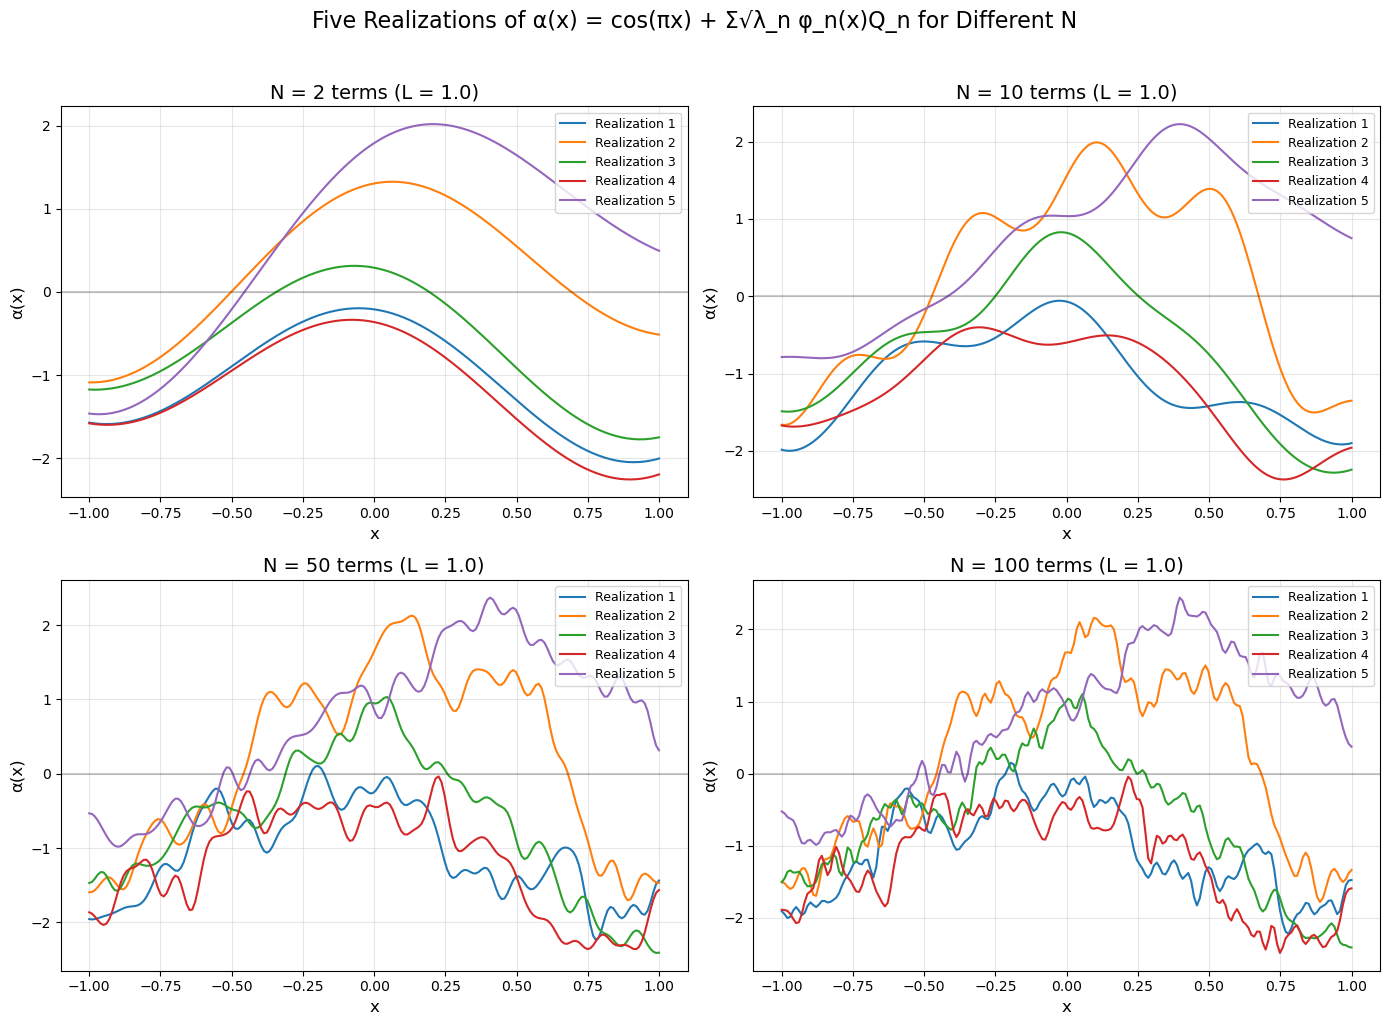

In [3]:
N_values = N_terms

Q_vectors = [np.random.randn(100) for _ in range(5)]

# Create a 2x2 grid of plots (for N=2, 10, 50, 100)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot for each N value
for idx, N in enumerate(N_values):
    ax = axes[idx]
    
    # Plot all 5 realizations for this N
    for q_idx, Q in enumerate(Q_vectors):
        α_N =  np.cos(np.pi*x)
        
        # Add KL expansion terms
        for n in range(1, N+1):
            λ_n = 1/(1 + (L**2) * (eta_n[n-1]**2))
            φ_n = eigenfunction(n, x, L)
            α_N += np.sqrt(λ_n) * φ_n * Q[n-1]
    
        ax.plot(x, α_N, linewidth=1.5, label=f'Realization {q_idx+1}')
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('α(x)', fontsize=12)
    ax.set_title(f'N = {N} terms (L = {L})', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.2)
    
    ax.legend(fontsize=9, loc='upper right')

# Add overall title
plt.suptitle('Five Realizations of α(x) = cos(πx) + Σ√λ_n φ_n(x)Q_n for Different N', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# 3.4

The convergence behavior of the Karhunen-Loève expansion for the Gaussian process with exponential covariance $C(x,y) = \frac{1}{2L}e^{-|x-y|/L}$ is illustrated in the progression from N=2 to N=100 terms. With only N=2 terms, the realizations are very smooth and show limited variability, with all five curves following a similar basic shape dominated by the deterministic component $\cos(\pi x)$ plus minimal random perturbation. By N=100 terms, the curves become very rough with high-frequency oscillations, and the realizations appear to have converged to their final form with little apparent change from N=50 to N=100. This progression reflects the spectral decay rate of the eigenvalues, which follows $\lambda_n \sim 1/(n^2)$ for large $n$ (specifically $\lambda_n = 1/(1 + L^2\eta_n^2)$, where $\eta_n$ grow approximately linearly with $n$). This algebraic decay is relatively slow compared to exponential decay, explaining why a substantial number of terms are needed to capture the full character of the process; with more detail/variation, we require more eigenvalues to capture the characterestics of the function.

This convergence behavior has significant implications for dimension reduction. For large correlation lengths ($L \gg 1$, e.g., $L=100$), the eigenvalues decay rapidly as $\lambda_n \approx 1/(1 + (100)^2\eta_n^2)$, enabling excellent approximations with just a few KL modes; typically $N \approx 10-20$ terms can capture over 99% of the variance. This allows effective dimensionality reduction from an infinite-dimensional process space to a manageable finite dimension, yielding significant computational savings while maintaining accuracy. Conversely, for small correlation lengths ($L \ll 1$, e.g., $L=0.1$), the eigenvalue decay is much slower, following $\lambda_n \approx 1/(1 + (0.1)^2\eta_n^2)$. In this regime, dimension reduction becomes less effective as many modes are required to adequately capture the process characteristics, limiting potential computational benefits. This relationship between correlation length and eigenvalue decay rate directly determines the truncation error in the KL expansion and dictates the practical trade-off between model complexity and representation accuracy.

# 3.5


PROBLEM 2.2: Statistical Analysis of KL Expansion Realizations
Precomputing eigenpairs...
Generating 500 realizations...
  Generated 100/500 realizations
  Generated 200/500 realizations
  Generated 300/500 realizations
  Generated 400/500 realizations
  Generated 500/500 realizations
Realizations generated successfully!


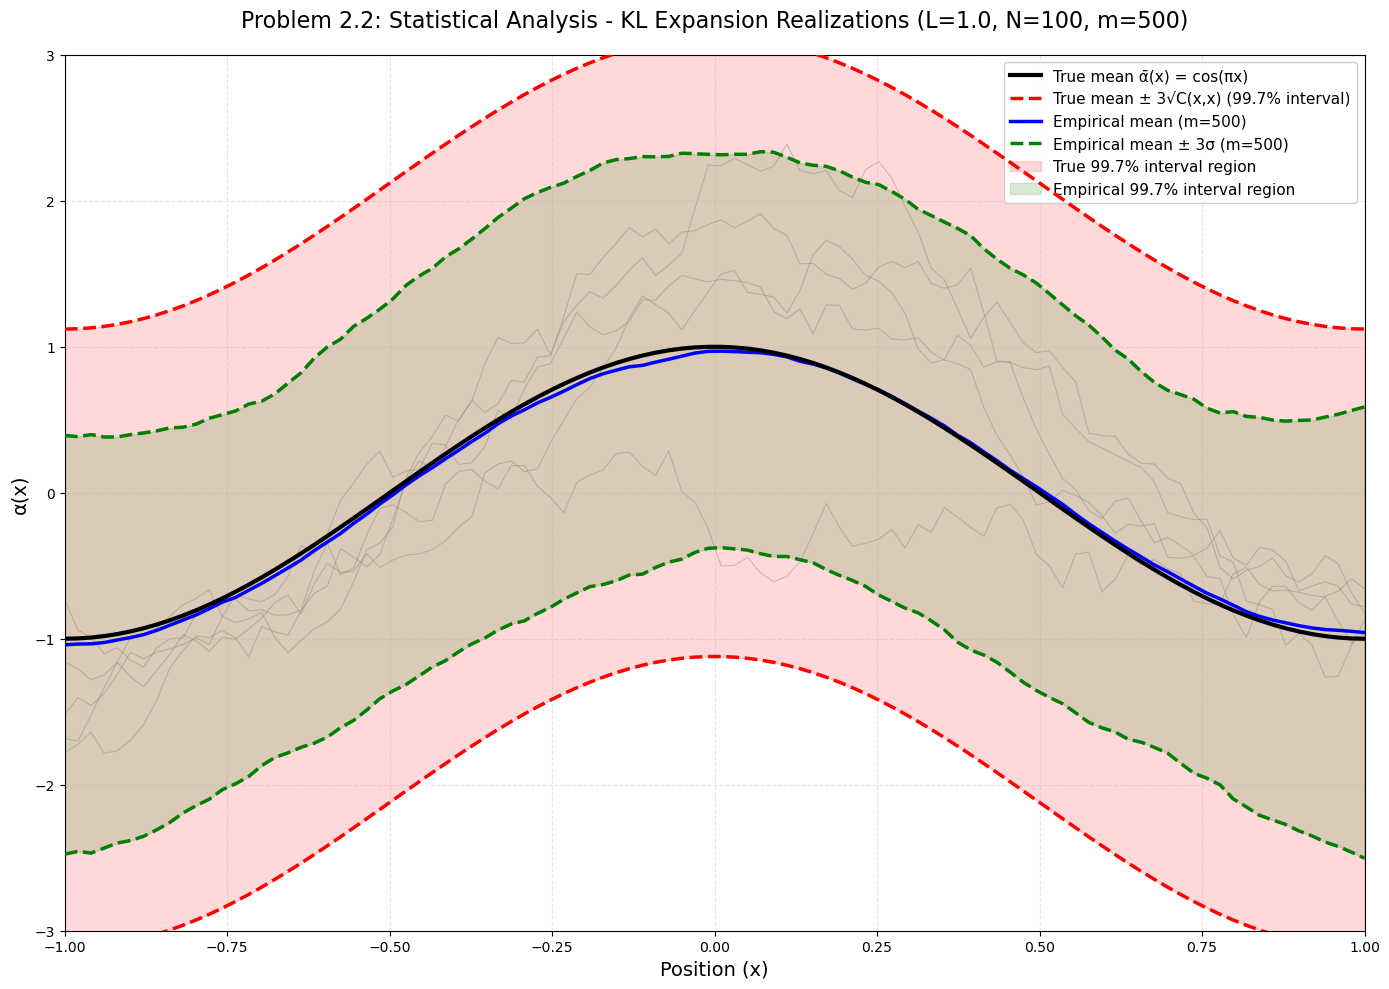

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from problem3 import compute_eigenpairs

# ============================================
# Problem 2.2: Statistical Analysis
# ============================================
print("\n" + "="*60)
print("PROBLEM 2.2: Statistical Analysis of KL Expansion Realizations")
print("="*60)

# Parameters
L = 1.0
m = 500  # Number of realizations
N = 100  # Number of KL terms to use
x = np.linspace(-1, 1, 100)  # Position array (xi values)
eta_n = data['etaVals_001p0'].flatten()  # Use eta values for L=0.01 (adjust as needed)
# True mean function
alpha_mean = np.cos(np.pi * x)

# Precompute eigenpairs once for efficiency
print("Precomputing eigenpairs...")
lambdas, phis = compute_eigenpairs(L, x,eta_n, N)

# Generate m realizations
print(f"Generating {m} realizations...")
realizations = np.zeros((m, len(x)))

for realization_idx in range(m):
    # Generate random Q vector with N i.i.d. standard normal variables
    Q = np.random.randn(N)
    
    # Start with the mean function
    α_N = np.cos(np.pi * x)
    
    # Add KL expansion terms
    for n in range(1,N+1):

        λ_n = lambdas[n-1]
        φ_n = phis[n-1, :]
        α_N += np.sqrt(λ_n) * φ_n * Q[n-1]
    
    realizations[realization_idx, :] = α_N
    
    # Show progress for large m
    if (realization_idx + 1) % 100 == 0:
        print(f"  Generated {realization_idx + 1}/{m} realizations")

print("Realizations generated successfully!")

# Compute empirical statistics at each x_i
μ_empirical = np.mean(realizations, axis=0)
σ_empirical = np.std(realizations, axis=0)

# Build true covariance matrix
n = len(x)
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        C[i, j] = 1/(2*L) * np.exp(-np.abs(x[i] - x[j]) / L)

C_diag = np.diag(C)

# Create comprehensive plot
plt.figure(figsize=(14, 10))

# Plot the true mean
plt.plot(x, alpha_mean, 'k-', linewidth=3, label='True mean ᾱ(x) = cos(πx)', zorder=10)

# Plot true 99.7% credible interval (±3√C(x,x))
plt.plot(x, alpha_mean + 3*np.sqrt(C_diag), 'r--', linewidth=2.5, 
         label='True mean ± 3√C(x,x) (99.7% interval)', zorder=9)
plt.plot(x, alpha_mean - 3*np.sqrt(C_diag), 'r--', linewidth=2.5, zorder=9)

# Plot empirical mean
plt.plot(x, μ_empirical, 'b-', linewidth=2.5, label=f'Empirical mean (m={m})', zorder=8)

# Plot empirical 99.7% interval (±3σ)
plt.plot(x, μ_empirical + 3*σ_empirical, 'g--', linewidth=2.5, 
         label=f'Empirical mean ± 3σ (m={m})', zorder=7)
plt.plot(x, μ_empirical - 3*σ_empirical, 'g--', linewidth=2.5, zorder=7)

# Fill between for better visualization
plt.fill_between(x, alpha_mean - 3*np.sqrt(C_diag), alpha_mean + 3*np.sqrt(C_diag), 
                 alpha=0.15, color='red', label='True 99.7% interval region')
plt.fill_between(x, μ_empirical - 3*σ_empirical, μ_empirical + 3*σ_empirical, 
                 alpha=0.15, color='green', label='Empirical 99.7% interval region')

# Plot a few sample realizations for context (optional)
for i in range(5):  # Plot first 5 realizations
    plt.plot(x, realizations[i, :], 'gray', alpha=0.4, linewidth=0.8, zorder=1)

plt.xlabel('Position (x)', fontsize=14)
plt.ylabel('α(x)', fontsize=14)
plt.title(f'Problem 2.2: Statistical Analysis - KL Expansion Realizations (L={L}, N={N}, m={m})', 
          fontsize=16, pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right', framealpha=0.95)
plt.ylim(-3, 3)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()



PROBLEM 2.3: Distribution at x = 0

x = 0 is at index 50 (x[50] = 0.010101)
True mean at x=0: ᾱ(0) = 0.999497
True variance at x=0: C(0,0) = 0.500000
True std deviation at x=0: √C(0,0) = 0.707107

Empirical mean at x=0: 0.969674
Empirical variance at x=0: 0.201141
Empirical std deviation at x=0: 0.448488


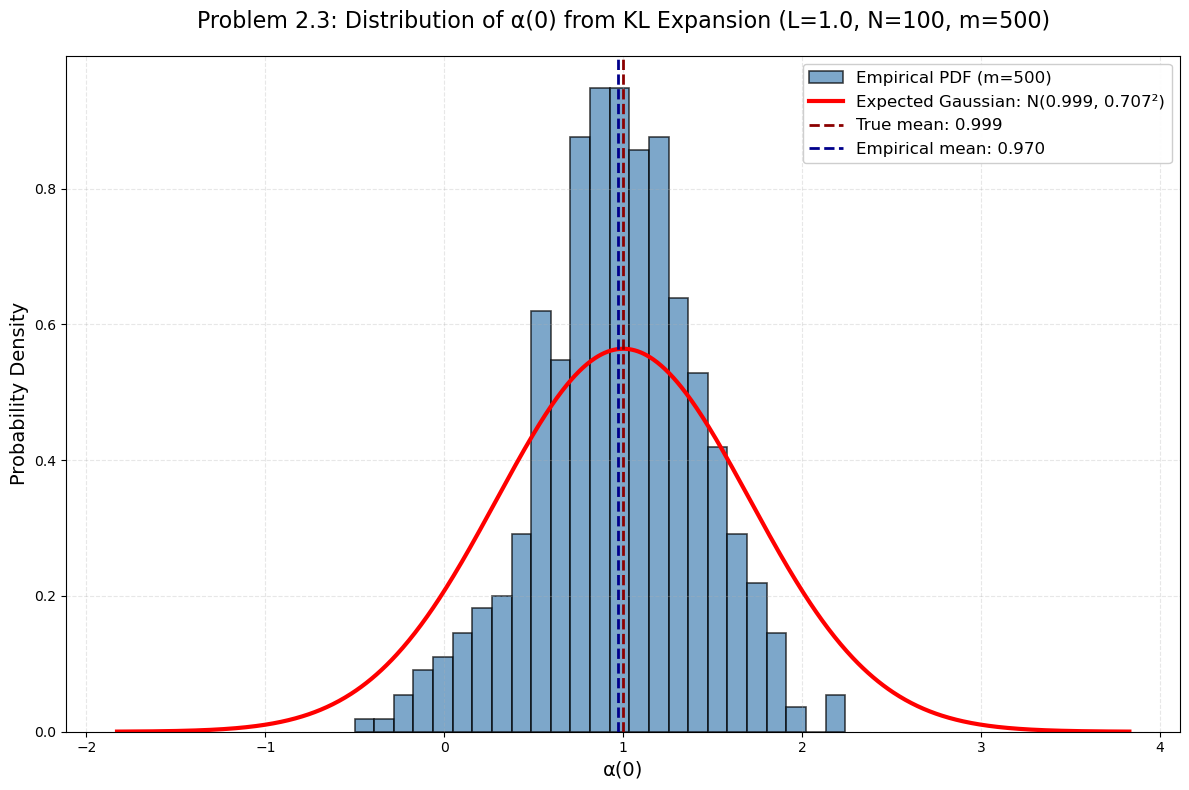

In [34]:
from scipy.stats import norm
print("\n" + "="*60)
print("PROBLEM 2.3: Distribution at x = 0")
print("="*60)

# Find index for x = 0 (should be x_51 since we have 101 points from -1 to 1)
x0_idx = 50  # Index 50 corresponds to x=0 (0-based indexing)
print(f"\nx = 0 is at index {x0_idx} (x[{x0_idx}] = {x[x0_idx]:.6f})")

# Extract values at x = 0 from all realizations
α_x0 = realizations[:, x0_idx]

# Expected Gaussian parameters for x = 0
α_x0_true_mean = alpha_mean[x0_idx]  # cos(π*0) = 1
C_x0_x0 = C_diag[x0_idx]  # True variance at x = 0

print(f"True mean at x=0: ᾱ(0) = {α_x0_true_mean:.6f}")
print(f"True variance at x=0: C(0,0) = {C_x0_x0:.6f}")
print(f"True std deviation at x=0: √C(0,0) = {np.sqrt(C_x0_x0):.6f}")
print(f"\nEmpirical mean at x=0: {np.mean(α_x0):.6f}")
print(f"Empirical variance at x=0: {np.var(α_x0):.6f}")
print(f"Empirical std deviation at x=0: {np.std(α_x0):.6f}")

# Create histogram with PDF normalization
plt.figure(figsize=(12, 8))

# Histogram of empirical values with PDF normalization
n_bins = 25
hist_values, bin_edges, patches = plt.hist(α_x0, bins=n_bins, density=True, 
                                           alpha=0.7, color='steelblue', 
                                           edgecolor='black', linewidth=1.2,
                                           label=f'Empirical PDF (m={m})')

# Expected Gaussian distribution
x_grid = np.linspace(α_x0_true_mean - 4*np.sqrt(C_x0_x0), 
                     α_x0_true_mean + 4*np.sqrt(C_x0_x0), 1000)
pdf_expected = norm.pdf(x_grid, α_x0_true_mean, np.sqrt(C_x0_x0))
plt.plot(x_grid, pdf_expected, 'r-', linewidth=3, 
         label=f'Expected Gaussian: N({α_x0_true_mean:.3f}, {np.sqrt(C_x0_x0):.3f}²)')

# Add vertical lines for means
plt.axvline(x=α_x0_true_mean, color='darkred', linestyle='--', linewidth=2, 
            label=f'True mean: {α_x0_true_mean:.3f}')
plt.axvline(x=np.mean(α_x0), color='darkblue', linestyle='--', linewidth=2, 
            label=f'Empirical mean: {np.mean(α_x0):.3f}')

plt.xlabel('α(0)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Problem 2.3: Distribution of α(0) from KL Expansion (L={L}, N={N}, m={m})', 
          fontsize=16, pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, framealpha=0.95)
plt.tight_layout()
plt.show()


# 3.7


Compared to Problem~2.2, the KL-expansion yields slightly less variation in the resulting plots. 
Specifically, for $N=2$: $\sigma \approx 0.378$; for $N=9$: $\sigma \approx 0.465$; and for $N=100$: $\sigma \approx 0.478$ (average standard deviation across $x$). 
The variance clearly increases as more terms are retained in the expansion. 
A similar trend is evident in Problem~3.6, where the standard deviation at $\alpha(0)$ grows from $0.0052$ for $N=2$ to $0.448$ for $N=100$.

The variance is lower with truncation because discarding higher-order KL terms removes their contribution to the total stochastic energy. 
Since the eigenvalues $\lambda_n$ represent the variance captured by each mode, truncating at $N$ terms yields a total variance of $\sum_{n=1}^N \lambda_n$, which is strictly less than the full process variance $\sum_{n=1}^\infty \lambda_n$. 
Consequently, realizations are systematically under-dispersed until $N$ is sufficiently large for the tail sum $\sum_{n=N+1}^\infty \lambda_n$ to become negligible.

While individual realizations may appear visually adequate with relatively few terms, the ensemble statistics require more terms to accurately capture the full covariance structure. 
This discrepancy occurs because individual sample paths can be reasonably approximated by the dominant modes, whereas the complete stochastic distribution requires contributions from higher-order modes to achieve the correct variance. 
The slow approach to the theoretical variance---even with $100$ terms the empirical variance remains slightly below the true value---highlights the challenge of capturing the ``tails'' of the eigenvalue spectrum, where many small but collectively significant contributions reside.

# 4

The analysis demonstrates that the characteristic length L fundamentally governs the spatial correlation structure of the process: smaller L values produce rapidly fluctuating, less correlated realizations, while larger L yields smoother, more strongly correlated variations. This directly illustrates how the covariance kernel's parameters shape the qualitative behavior of random processes, for example a Gaussian prior for a spatially varying inverse problem.

The KL expansion utilizes a truncated spectral representation that retains only the most significant (orthogonal) eigenmodes, thus achieving substantial dimensionality reduction while preserving statistical accuracy. The (rapid) eigenvalue decay (especially with large correlation length) means that only the first few modes are sufficient to represent the random process accurately. 

With more terms in the KL expansion, the variance of the KL expansion increases, and the expansion becomes more faithful to the random process.
Decompositions of the covariance matrix (e.g., Cholesky decomposition) allows for computationally efficient generation of realizations, when the eigenpairs have been precomputed.

Finally, through generating multiple realizations and computing empirical statistics, I confirmed the central limit theorem effect in practice: with m = 500 realizations, the empirical mean closely matched the theoretical mean, and the empirical covariance matrix converged toward the true covariance structure.